In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# python Datenauswertung
#CSV_Datei = "df_eu_2023.csv"
#pathDat =f"{"/files/"}{CSV_Datei}"
df = pd.read_csv("files/df_eu_2023.csv", sep = ",", header = 0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10734898 entries, 0 to 10734897
Data columns (total 14 columns):
 #   Column               Dtype  
---  ------               -----  
 0   Unnamed: 0           int64  
 1   Identification       object 
 2   MS                   object 
 3   Mt                   float64
 4   Ewltp (g/km)         float64
 5   Ft                   object 
 6   Fm                   object 
 7   ec (cm3)             float64
 8   ep (KW)              float64
 9   z (Wh/km)            float64
 10  IT                   object 
 11  Erwltp (g/km)        float64
 12  Fuel consumption     float64
 13  Electric range (km)  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 1.1+ GB


In [ ]:
df.head()

,Unnamed: 0,Identification,MS,Mt,Ewltp (g/km),Ft,Fm,ec (cm3),ep (KW),z (Wh/km),IT,Erwltp (g/km),Fuel consumption,Electric range (km)
0,0,CUPRA - 5FP - CUPRA ATECA - M1,DE,1762.0,203.0,petrol,M,1984.0,221.0,NaN,e9 29 37,1.96,9.0,NaN
1,1,VOLKSWAGEN VW - E2 - ID4 PRO 150 KW - M1,DE,2258.0,0.0,electric,E,NaN,150.0,176.0,NaN,NaN,NaN,501.0
2,2,BMW - G3K - 318D - M1,DE,1852.0,135.0,diesel,H,1995.0,110.0,NaN,e24 32 37,1.84,5.2,NaN
3,3,FORD - J2K - PUMA - M1,DE,1447.0,129.0,petrol,H,999.0,92.0,NaN,e9 32 37,2.00,5.7,NaN
4,4,AUDI - FY - Q5 - M1G,DE,2104.0,176.0,diesel,H,1968.0,150.0,NaN,e13 33 37,1.86,6.7,NaN


# Neuer Abschnitt

In [ ]:
df.isna().sum()

Unnamed: 0                   0
Identification           19586
MS                           0
Mt                      161527
Ewltp (g/km)             13366
Ft                           0
Fm                           0
ec (cm3)               1670030
ep (KW)                  50683
z (Wh/km)              8298363
IT                     3748017
Erwltp (g/km)          3790286
Fuel consumption       1888975
Electric range (km)    8306433
dtype: int64

In [19]:
df.describe()

,Unnamed: 0,Mt,Ewltp (g/km),ec (cm3),ep (KW),z (Wh/km),Erwltp (g/km),Fuel consumption,Electric range (km)
count,1.073490e+07,1.057337e+07,1.072153e+07,9.064868e+06,1.068422e+07,2.436535e+06,6.944612e+06,8.845923e+06,2.428465e+06
mean,5.367448e+06,1.658169e+03,1.065199e+02,1.545022e+03,1.152157e+02,1.720280e+02,1.511407e+00,5.445940e+00,3.126688e+02
std,3.098898e+06,3.768652e+02,5.962395e+01,5.281390e+02,6.291614e+01,2.847060e+01,5.086313e-01,1.765757e+00,1.932649e+02
min,0.000000e+00,6.150000e+02,0.000000e+00,6.580000e+02,8.000000e+00,1.200000e+01,5.000000e-01,1.000000e-01,1.200000e+01
25%,2.683724e+06,1.375000e+03,1.000000e+02,1.197000e+03,7.400000e+01,1.550000e+02,1.080000e+00,4.900000e+00,7.500000e+01
50%,5.367448e+06,1.585000e+03,1.230000e+02,1.497000e+03,1.000000e+02,1.660000e+02,1.700000e+00,5.500000e+00,3.620000e+02
75%,8.051173e+06,1.890000e+03,1.390000e+02,1.968000e+03,1.320000e+02,1.790000e+02,1.960000e+00,6.200000e+00,4.870000e+02
max,1.073490e+07,4.574000e+03,5.720000e+02,7.997000e+03,1.177000e+03,6.000000e+02,3.000000e+00,2.520000e+01,8.830000e+02


In [ ]:
df.shape  #  (Zeilen, Spalten)


(10734898, 14)

In [4]:
df_cleaned = df.dropna(subset=["Erwltp (g/km)",	"ep (KW)"], axis=0)
df_cleaned.head()

,Unnamed: 0,Identification,MS,Mt,Ewltp (g/km),Ft,Fm,ec (cm3),ep (KW),z (Wh/km),IT,Erwltp (g/km),Fuel consumption,Electric range (km)
0,0,CUPRA - 5FP - CUPRA ATECA - M1,DE,1762.0,203.0,petrol,M,1984.0,221.0,NaN,e9 29 37,1.96,9.0,NaN
2,2,BMW - G3K - 318D - M1,DE,1852.0,135.0,diesel,H,1995.0,110.0,NaN,e24 32 37,1.84,5.2,NaN
3,3,FORD - J2K - PUMA - M1,DE,1447.0,129.0,petrol,H,999.0,92.0,NaN,e9 32 37,2.00,5.7,NaN
4,4,AUDI - FY - Q5 - M1G,DE,2104.0,176.0,diesel,H,1968.0,150.0,NaN,e13 33 37,1.86,6.7,NaN
5,5,VOLKSWAGEN VW - 3C - PASSAT - M1,DE,1726.0,166.0,petrol,M,1984.0,140.0,NaN,e1 28 29,1.98,7.3,NaN


Text(0.5, 1.0, 'Scatterplot')

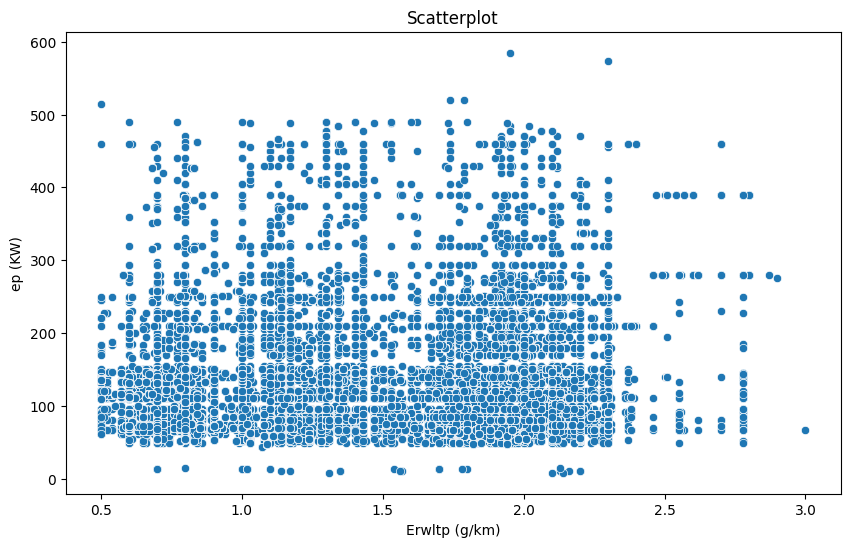

In [30]:
fig = plt.figure(figsize=(10, 6))
sns.scatterplot(x="Erwltp (g/km)", y="ep (KW)", data=df_cleaned)
plt.title("Scatterplot")

Text(0, 0.5, 'Frequency in percent')

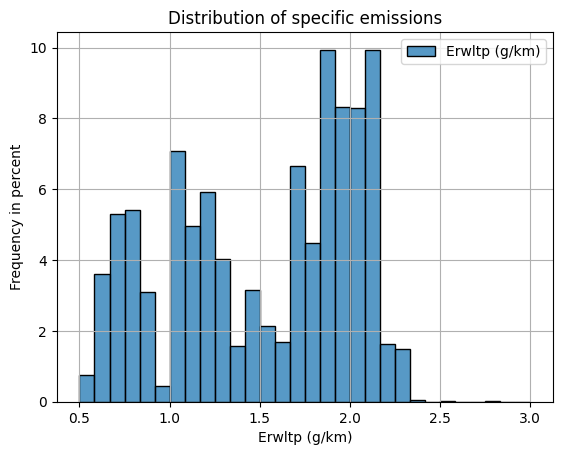

In [12]:
# Diestribution of specific emissions
sns.histplot(df_cleaned["Erwltp (g/km)"], bins=30, stat="percent", label="Erwltp (g/km)")
plt.legend()
plt.title("Distribution of specific emissions")
plt.grid(True)
plt.xlabel("Erwltp (g/km)")
plt.ylabel("Frequency in percent")

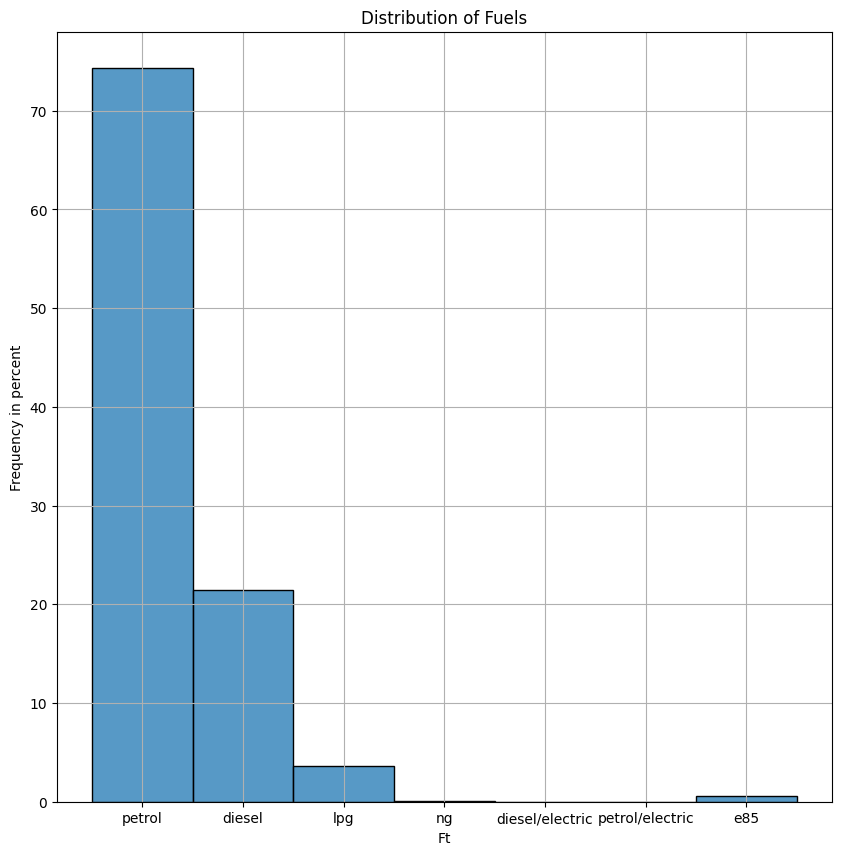

In [10]:
#Distribution of Fuels
fig = plt.figure(figsize=(10, 10))
sns.histplot(df_cleaned["Ft"], stat= "percent", label="Fuel")
plt.title("Distribution of Fuels")
plt.ylabel("Frequency in percent")
plt.grid(True)

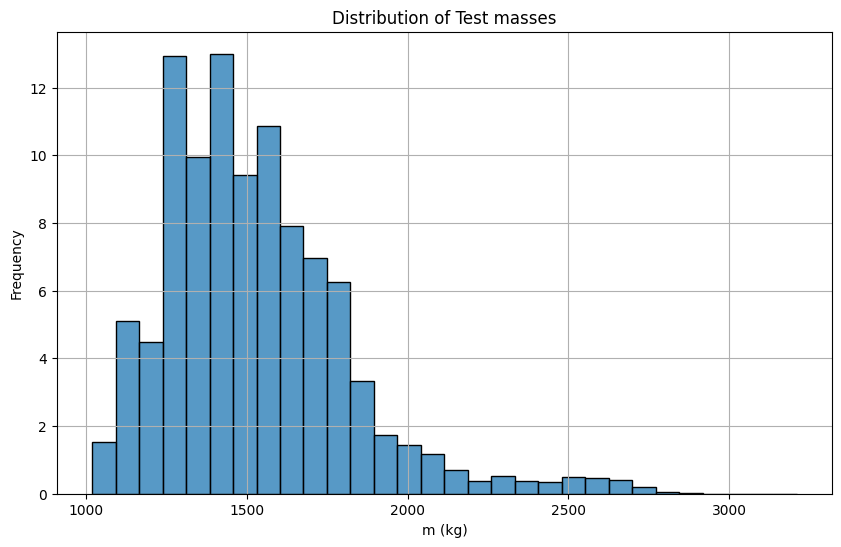

In [9]:
# Distribution of Test masses
fig = plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned["Mt"], bins=30, stat= "percent", label="m (kg)")
plt.xlabel("m (kg)")
plt.ylabel("Frequency")
plt.title("Distribution of Test masses")
plt.grid(True)

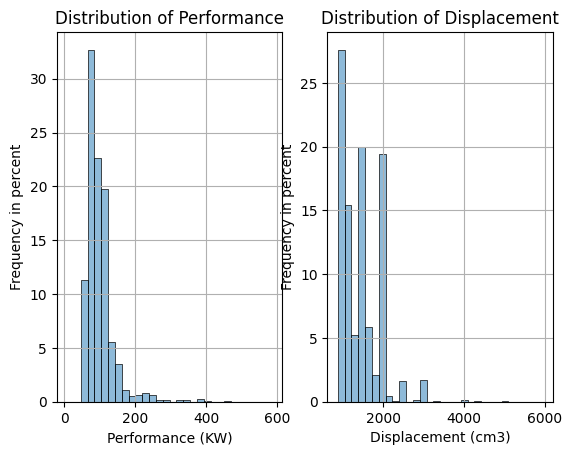

In [14]:
#Disttribution of Performance
plt.subplot(1, 2, 1)
sns.histplot(df_cleaned["ep (KW)"], bins=30,stat="percent", alpha=0.5, label="Performance")
plt.xlabel("Performance (KW)")
plt.ylabel("Frequency in percent")
plt.title("Distribution of Performance")
plt.grid(True)
# Distribution of Displacement
plt.subplot(1, 2, 2)
sns.histplot(df_cleaned["ec (cm3)"], bins=30,stat="percent", alpha=0.5, label="displacement")
plt.xlabel("Displacement (cm3)")
plt.ylabel("Frequency in percent")
plt.title("Distribution of Displacement")
plt.grid(True)

Text(0.5, 1.0, 'Distribution of Registrations')

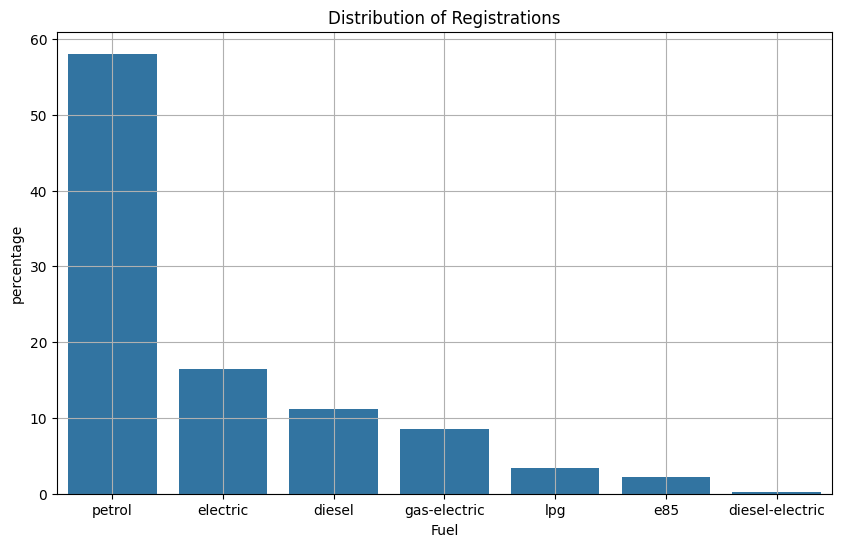

In [24]:
Registration ={ "petrol": 1090719,"electric": 309394, "diesel": 209535, "gas-electric":  160367, "lpg": 63536, "e85": 40887, "diesel-electric": 4462}
df = pd.DataFrame(Registration.items(), columns=["Fuel", "Registration"])

#Distribution of Registrations
fig = plt.figure(figsize=(10, 6))
df["percentage"] = df["Registration"]/df["Registration"].sum()*100
sns.barplot(x="Fuel", y="percentage", data=df)
plt.grid(True)
plt.title("Distribution of Registrations")